In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
WORKING_DIRECTORY = '/content/drive/MyDrive/trial-swiggy'
os.chdir(WORKING_DIRECTORY)

In [ ]:
!ls

2  5		detectro.csv	   test		    train
3  8		detectron.csv	   test.csv	    train.csv
4  annotations	food_metadata.csv  test_labels.csv  train_labels.csv


In [ ]:
!pip install detecto

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torch
import torchvision
import matplotlib.pyplot as plt

from torchvision import transforms
from detecto import core, utils, visualize

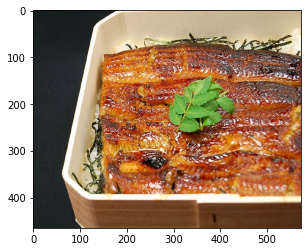

In [ ]:
image = utils.read_image('/content/drive/MyDrive/trial-swiggy/train/101.jpg')
plt.imshow(image)
plt.show()

In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/trial-swiggy/train.csv')
df.head()

,filename,width,height,class,xmin,ymin,xmax,ymax,image_id


In [ ]:
utils.xml_to_csv('train', 'train.csv')
utils.xml_to_csv('test', 'test.csv')

,filename,width,height,class,xmin,ymin,xmax,ymax,image_id
0,212.jpg,250,250,pilaf,0,75,250,236,0
1,10708.jpg,360,480,pork cutlet on rice,0,69,337,388,1
2,155.jpg,690,430,eels on rice,33,44,453,394,2
3,371.jpg,800,600,chicken-'n'-egg on rice,0,0,800,600,3
4,746.jpg,480,480,chicken rice,0,58,480,480,4
...,...,...,...,...,...,...,...,...,...
120,147.jpg,180,138,eels on rice,47,34,135,98,119
121,215.jpg,224,171,pilaf,0,49,224,171,120
122,16267.jpg,600,450,pork cutlet on rice,6,48,378,388,121
123,167.jpg,200,150,eels on rice,0,25,106,115,122


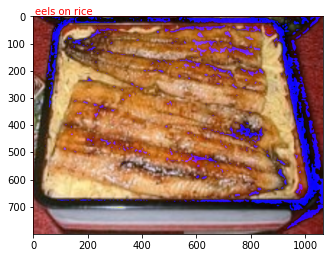

In [ ]:
transform_img = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize(800),
    transforms.RandomHorizontalFlip(0.5),
    transforms.ToTensor(),
    utils.normalize_transform(),
])
dataset = core.Dataset('train.csv', 'train/', transform=transform_img)
image, target = dataset[0]
visualize.show_labeled_image(image, target['boxes'], target['labels'])

Epoch 1 of 10
Begin iterating over training dataset


100%|██████████| 245/245 [01:11<00:00,  3.40it/s]


Begin iterating over validation dataset


100%|██████████| 124/124 [00:09<00:00, 13.42it/s]


Loss: 0.15291496095878462
Epoch 2 of 10
Begin iterating over training dataset


100%|██████████| 245/245 [01:11<00:00,  3.41it/s]


Begin iterating over validation dataset


100%|██████████| 124/124 [00:09<00:00, 13.38it/s]


Loss: 0.12867338579869078
Epoch 3 of 10
Begin iterating over training dataset


100%|██████████| 245/245 [01:12<00:00,  3.40it/s]


Begin iterating over validation dataset


100%|██████████| 124/124 [00:09<00:00, 13.35it/s]


Loss: 0.11153017044548065
Epoch 4 of 10
Begin iterating over training dataset


100%|██████████| 245/245 [01:12<00:00,  3.39it/s]


Begin iterating over validation dataset


100%|██████████| 124/124 [00:09<00:00, 13.45it/s]


Loss: 0.09640213384503318
Epoch 5 of 10
Begin iterating over training dataset


100%|██████████| 245/245 [01:12<00:00,  3.38it/s]


Begin iterating over validation dataset


100%|██████████| 124/124 [00:09<00:00, 13.36it/s]


Loss: 0.09563588226334221
Epoch 6 of 10
Begin iterating over training dataset


100%|██████████| 245/245 [01:12<00:00,  3.38it/s]


Begin iterating over validation dataset


100%|██████████| 124/124 [00:09<00:00, 13.42it/s]


Loss: 0.0946013095578359
Epoch 7 of 10
Begin iterating over training dataset


100%|██████████| 245/245 [01:12<00:00,  3.39it/s]


Begin iterating over validation dataset


100%|██████████| 124/124 [00:09<00:00, 13.39it/s]


Loss: 0.09406948561269429
Epoch 8 of 10
Begin iterating over training dataset


100%|██████████| 245/245 [01:12<00:00,  3.36it/s]


Begin iterating over validation dataset


100%|██████████| 124/124 [00:09<00:00, 13.43it/s]


Loss: 0.09532402185422759
Epoch 9 of 10
Begin iterating over training dataset


100%|██████████| 245/245 [01:12<00:00,  3.37it/s]


Begin iterating over validation dataset


100%|██████████| 124/124 [00:09<00:00, 13.41it/s]


Loss: 0.09377204993319127
Epoch 10 of 10
Begin iterating over training dataset


100%|██████████| 245/245 [01:12<00:00,  3.40it/s]


Begin iterating over validation dataset


100%|██████████| 124/124 [00:10<00:00, 11.69it/s]

Loss: 0.09430840749654078


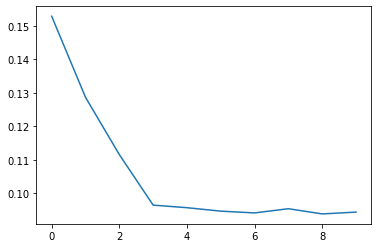

In [ ]:
val_dataset = core.Dataset('test.csv', 'test/')
loader = core.DataLoader(dataset, batch_size=2, shuffle=True)
model = core.Model(['eels on rice','pilaf',"chicken-'n'-egg on rice",'pork cutlet on rice','chicken rice'])
losses = model.fit(loader, val_dataset, epochs=10, verbose=True)
plt.plot(losses)
plt.show()

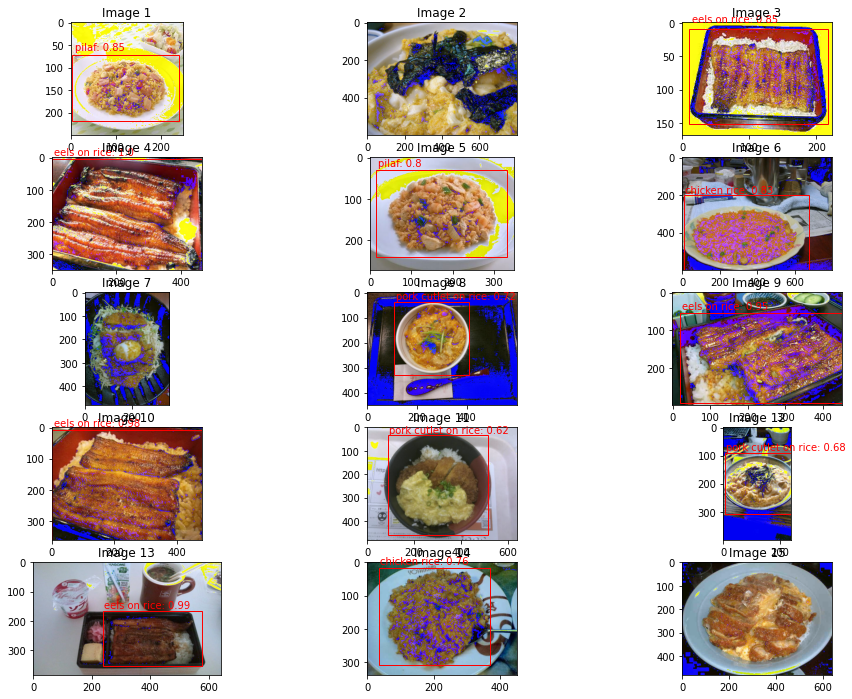

In [ ]:
images = []
for i in range(0, 45, 3):
    image, _ = val_dataset[i]
    images.append(image)
visualize.plot_prediction_grid(model, images, dim=(5, 3), figsize=(16, 12))